# Find more complex boundaries using Linear Regression ---> Multivariate Regression

### We used linear regression to find the best fit line between $x$ and $y$.
### At first glance, it may seem like a weak algorithm, not suited for more complex boundaries.
### Let's look at a single feature dataset:
### $x | y$
### $1 | 3$
### $2 | 5$
### $3 | 7$
### $4 | 9$
### Here $y = mx + c$ for some $m$ and $c$. A linear function.

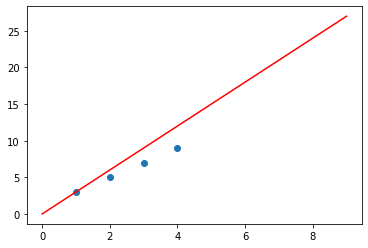

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x_line1 = np.arange(0, 10, 1)
y_line1 = 3 * x_line1 + 0
plt.plot(x_line1, y_line1, 'r')
X = [1, 2, 3, 4]
Y = [3, 5, 7, 9]
plt.scatter(X, Y)
plt.show()

### Now, let us introduce a new feature: $x_{}x$.
### where $x_{}x = x^2$.
### Our dataset now looks like:
### $x | x_{}x | y$
### $1 | 01 | 3$
### $2 | 04 | 5$
### $3 | 09 |7$
### $4 | 16| 9$
### Here $y = m_1x + m_2x_{}x + c$ for some $m_1, m_2$ and $c$. Still, a linear function in 3D space. A plane.
### **BUT**, $x$ and $x_{}x$ are dependent on each other, therefore we get:
### $y = m_1x + m_2x^2 + c$. A non-linear function in 2D space. A parabola.
### In other words, we can now predict more complex boundaries with Linear Regression.
### In the same manner, we may add new features dependent on our original feature set, creating more and more complex boundaries. We can take exponents, logarithms, polynomials and the like.

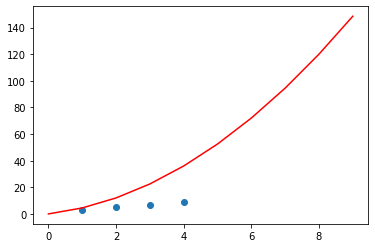

In [12]:
x_line1 = np.arange(0, 10, 1)
y_line1 = 3 * x_line1 + 1.5 * x_line1**2 + 0
plt.plot(x_line1, y_line1, 'r')
X = [1, 2, 3, 4]
Y = [3, 5, 7, 9]
plt.scatter(X, Y)
plt.show()

## Playing with the Boston Dataset

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
Y = boston.target

In [34]:
X.shape

(506, 13)

## Adding features manually

In [35]:
import pandas as pd
df = pd.DataFrame(X)
print(boston.feature_names)
df.columns = boston.feature_names
# Adding new feature
df["AGE_AGE"] = df.AGE ** 2
X2 = df.values
X2.shape

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506, 14)

In [36]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X2, Y)

In [37]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()

In [38]:
alg.fit(x_train, y_train)

LinearRegression()

In [39]:
score = alg.score(x_test, y_test)
score

0.6898250572248072

## Now adding extra features using sklearn

In [45]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])
# include all dependent features of degree 2
model = model.fit(x_train, y_train)
model.named_steps['linear'].coef_
print(model.score(x_test, y_test))

0.8630284548570117


### The linear model trained on polynomial features is able to exactly recover the input polynomial coefficients.

### In some cases it’s not necessary to include higher powers of any single feature, but only the so-called interaction features that multiply together at most $d$ distinct features. These can be gotten from PolynomialFeatures with the setting interaction_only=True.

### For example, when dealing with boolean features, $x^n_i = x_i$ for all $n$ and is therefore useless; but $x_ix_j$ represents the conjunction of two booleans. This way, we can solve the XOR problem with a linear classifier:

In [47]:
model = Pipeline([('poly', PolynomialFeatures(degree=2, interaction_only = True)), ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(x_train, y_train)
model.named_steps['linear'].coef_
print(model.score(x_test, y_test))

0.8382258994368881


# Complexity Analysis of Generic Equations

### Our feature set won't always contain 1 or 2 features.
### So how do we find $m$ and $c$ in the generic case.
### $y = m_1 * x^1_i + m_2 * x^2_i + m_3 * x^3_i + .... + m_n * x^n_i + c$
### We can't really differentiate between all possible numbers and find the values of $m_i$.
### In this case we look at $X$ in a different light. (X is the vector representation of all features)
### We take $X$ to be a $m * (n + 1)$ sized matrix. The "$+1$" is for representing the intercepts; $m$ is the size of the dataset and $n$ is the number of features.
### The last column of the matrix consists of $1's$.
### $X = \begin{bmatrix} x^1_1 & x^2_1 & x^3_1 &...... &x^n_1 & 1 \\ x^1_2 & x^2_2 & x^3_2 &...... &x^n_2 & 1\\ x^1_3 & x^2_3 & x^3_3 &...... &x^n_3 & 1\\ . & . & . &...... &. & 1\\ . & . & . &...... &. & 1\\ . & . & . &...... &. & 1\\ x^1_m & x^2_m & x^3_m &...... &x^n_m & 1\end{bmatrix}$
### $Coeff = \begin{bmatrix} m_1\\ m_2\\ m_3\\ . &\\ .\\ .\\ m_m\end{bmatrix}$
### $Y = \begin{bmatrix} x^1_1 & x^2_1 & x^3_1 &...... &x^n_1 & 1 \\ x^1_2 & x^2_2 & x^3_2 &...... &x^n_2 & 1\\ x^1_3 & x^2_3 & x^3_3 &...... &x^n_3 & 1\\ . & . & . &...... &. & 1\\ . & . & . &...... &. & 1\\ . & . & . &...... &. & 1\\ x^1_m & x^2_m & x^3_m &...... &x^n_m & 1\end{bmatrix} * \begin{bmatrix} m_1\\ m_2\\ m_3\\ . &\\ .\\ .\\ m_m\end{bmatrix} = \begin{bmatrix} y_1\\ y_2\\ y_3\\ . &\\ .\\ .\\ y_m\end{bmatrix}$
### $Y = X * Coeff$
### Our aim is finding the $Coeff$ matrix. To find it, we use:
### $Coeff = (X^TX)^{-1}*X^T*Y$

### The problem with the above method is that it's time complexity is too high: ~$O(n^3) + O(mn^2)$

### Therefore, we shall find an alternate method to calculate the values of $Coeff$ without the need for this humongous amount of computation. The values won't be exact, rather close approximates.

## Gradient Descent

### Let's talk about a single dimensional vector.
### Hypothesis|$f = y^p = mx + c$.
### We want to make sure that the cost function is minimized
### $Cost = cost(m, c) = \frac{1}{N}\sum_{i=0}^{n} (y_i - (m * x_i + c))^2$ -> Parabolic function
### We need to find minima for the parabola.

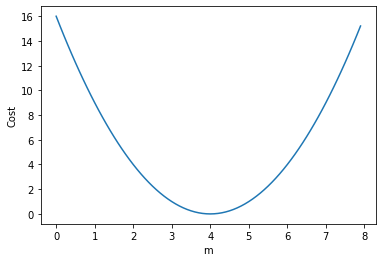

In [61]:
x = np.arange(0, 8, 0.1)
y = x**2 - 8*x + 16
plt.plot(x, y)
plt.xlabel("m")
plt.ylabel("Cost")
plt.show()

### We start at any given $m$, say 7. The corresponding cost would be 9. We then find a way to move towards a better cost.
### Tangents on the left side of the parabola have a negative slope, while tangents on the right side have a positive slope.
### Therefore, a plausible formula for shifting m may be:
### $m_{new} = m_{old} - slope$ --> something like this.
### The problem with the above formula is that it mey be reduced at every iteration. For this reason we introduce a constant $\alpha$.
### $m_{new} = m_{old} - \alpha * slope$.
### With the help of $\alpha$ we can increase or decrease the rate of change of $m$. It acts like a accelerator/decelerator.
### We continue iterating until the difference between two consecutive cost is negligible.
### $m_{new} = m_{old} - \alpha * slope_m$.
### $c_{new} = c_{old} - \alpha * slope_c$.
### where $slope_m = \frac{\partial Cost}{\partial m}$ and $slope_c = \frac{\partial Cost}{\partial c}$.

### $Cost = cost(m, c) = \frac{1}{N}\sum_{i=0}^{n} (y_i - (m * x_i + c))^2$

### $slope_m = \frac{\partial Cost}{\partial m} = \frac{2}{N}\sum_{i=0}^{n} (y_i - (m * x_i + c))(-x_i)$
### $slope_c = \frac{\partial Cost}{\partial c} = \frac{2}{N}\sum_{i=0}^{n} (y_i - (m * x_i + c))(-1)$

### We start at a random $m$ and $c$, calculate $slope_m$ and $slope_c$ and find new $m$ and $c$
### After repeating these iterative steps for a while, we should arrive at the minimum $Cost$.

## Learning Rate

### What is $\alpha$?
### While iterating to new $m$ and $c$, we may go a bit too far at times, overshoot as they say. It is also possible that we are moving too slow with each iteration. For this reason, we want a way to control the rate at which we are moving. $\alpha$ is the "rate controller".
### $\alpha$ is called the **Learning Rate**.
### If $alpha$ is too large, $m_{new}$ and $c_{new}$ will overshoot. It will lead to an ascent rather than a descent which is counterproductive because $Cost$ increases. Similarly, if $\alpha$ is too low, the descent will be too slow, reaching minima at $\infty$.

### Sometimes, we use **Adaptive Alpha**, which means that $\alpha$ adjusts itself by judging how close it is to the minima. It starts off large, and then reduces as it draws near to the minima.

## Code Gradient Descent

In [63]:
import numpy as np

In [67]:
def step_gradient(pt, lr, m, c):
    x = pt[:,0]
    y = pt[:,1]
    slope_m = 2 * sum(-(x*y).mean() + m*(x**2).mean() + c*(x).mean())
    slope_c = 2 * sum(-(y).mean() + m*(x).mean() + c)
    m = m - lr*slope_m
    c = c - lr*slope_c
    return m, c

In [68]:
def gd(data, lr, num_iter):
    m = 1
    c = 1
    for i in range(num_iter):
        m, c = step_gradient(data, lr, m ,c)

In [69]:
def run():
    data = np.loadtxt('data.csv', delimiter=',')
    lr = 0.001
    num_iter = 1000
    m, c = gd(data, lr, num_iter)
    print(m, c)

In [70]:
run()

TypeError: 'numpy.float64' object is not iterable